In [1]:
pip install mp-api

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 699.2 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.4/97.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.9/211.9 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.2/122.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.6/64.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 26.0 MB/s eta 0:00:00
   ━

In [70]:
import csv
import pandas as pd
with open("/content/5_numerical_data.csv", 'r') as file:
  df = pd.read_csv("/content/5_numerical_data.csv")

       nsites  nelements       volume    density  density_atomic  \
0           1          1    21.650678   1.227104       21.650678   
1          25          1   452.151027  16.878957       18.086041   
2           1          1   563.081622   0.187398      563.081622   
3          20          1   350.470784  17.420768       17.523539   
4          30          1   554.654563  16.251792       18.488485   
...       ...        ...          ...        ...             ...   
49767     180          8  2808.406623   2.194279       15.602259   
49768      90          8  1073.992069   1.493179       11.933245   
49769      90          8  1082.177067   1.472409       12.024190   
49770     102          8  1149.513873   2.555308       11.269744   
49771      50          8   614.254310   2.509727       12.285086   

       energy_per_atom  formation_energy_per_atom  energy_above_hull  \
0            -4.650825                   1.309826           1.309826   
1           -50.186677                 

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

# Create the list of features below
# this is what you want to base your prediction off of.
feature_names = ["nsites", "nelements", "is_gap_direct", "cbm",
                 "energy_per_atom", "is_metal","efermi" ,"vbm" ,"formation_energy_per_atom","density"  ]

# Select data corresponding to features in feature_names
X = df[feature_names]

y = df["band_gap"]

#specify the model.
#For model reproducibility, set a numeric value for random_state when specifying the model

from sklearn.tree import DecisionTreeRegressor

#This is our model, it bases its decisions off of binary trees
#also radom_state=1 allows for slight randomness. Is good practice
test_model = DecisionTreeRegressor(random_state=1)

#sets the model so it uses the features (X) to find our value we want to predict (y)
test_model.fit(X, y)

# saves the prediction results to predictions. .predict executes the prediction with the inserted data.

predictions = test_model.predict(X)

train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.2, random_state=1)

# Defines a model and uses it to fit a line of best fit for training data x and y
test_model = DecisionTreeRegressor(random_state=1)
test_model.fit(train_X, train_y)


# Predict with all validation observations
val_predictions = test_model.predict(val_X)

# using mae, mean absolute error, or the average error, we can see on average how far off our # model is
from sklearn.metrics import mean_absolute_error
# put in first the actual value, then the predicted values
val_mae = mean_absolute_error(val_y, val_predictions)

# Instead of accuracy_score, use metrics suitable for regression:
# mean squared error (MSE) and R-squared (R2)
mse = mean_squared_error(val_y, val_predictions)
r2 = r2_score(val_y, val_predictions)

print("Mean Squared Error: ", mse)
print("R-squared: ", r2)
print("Mean Absolute Error: ", val_mae)
test = 0
for row in val_predictions:
  test += 1
  print(row)
  if test == 10:
    break
print("")
test = 0
for row in val_y:
  test += 1
  print(row)
  if test == 10:
    break

Mean Squared Error:  0.030900208953488374
R-squared:  0.989819660705359
Mean Absolute Error:  0.06374397257521723
0.0
0.0
4.4443
2.7545
0.0
1.2553
1.7782
2.4246
3.2825
0.0

0.0
0.0
4.5183
2.9023
0.0
1.2626
1.8089
2.7567999999999997
3.4046000000000003
0.0


In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')

In [79]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

#Check for and handle categorical variables
label_encoder = LabelEncoder()

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=20, random_state=42, oob_score=True)
# train_X, val_X, train_y, val_y
regressor.fit(train_X, train_y)
# Fit the regressor with x and y data

RandomForestRegressor(n_estimators=20, oob_score=True, random_state=42)

In [84]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

# Access the OOB Score
# OOB Score is the number of correctly predicted data on OOB samples taken for validation, you want less than 1%
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
# train_X, val_X, train_y, val_y
# Making predictions on the same data or new data
predictions = regressor.predict(val_X)

# Evaluating the model
mse = mean_squared_error(val_y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(val_y, predictions)
print(f'R-squared: {r2}')

# using mae, mean absolute error, or the average error, we can see on average how far off our # model is

val_mae = mean_absolute_error(val_y, predictions)
print("Mean Absolute Error: ", val_mae)

Out-of-Bag Score: 0.9956411534656763
Mean Squared Error: 0.01940338100895701
R-squared: 0.9936073894376667
Mean Absolute Error:  0.0360289160681099
0.0
0.0
4.538875
2.9159100000000002
0.0
1.2375599999999998
1.8691599999999995
2.481885
3.2936099999999997
0.0

0.0
0.0
4.5183
2.9023
0.0
1.2626
1.8089
2.7567999999999997
3.4046000000000003
0.0


In [63]:
df['band_gap'].describe()

,band_gap
count,49772.000000
mean,1.341899
std,1.739477
min,0.000000
25%,0.000000
50%,0.265150
75%,2.443400
max,17.891400


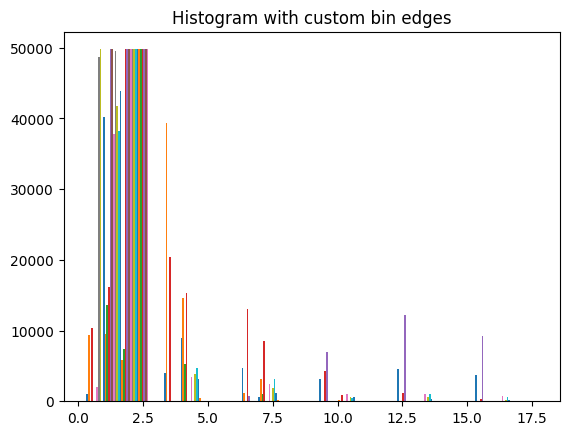

In [69]:
import matplotlib.pyplot as plt
import numpy as np


# # Method 1: Specify the number of bins
# plt.hist(df, bins = 7)
# plt.title("Histogram with 10 bins")
# plt.show()

plt.hist(df, bins=[ 0, 3, 6, 9,12,15,18])
plt.title("Histogram with custom bin edges")
plt.show()

